In [134]:
from distributed import Client

In [135]:
c = Client('dask.informaticslab.co.uk:8786')
c

<Client: scheduler="dask.informaticslab.co.uk:8786" processes=7 cores=14>

In [136]:
c.list_datasets()

['mogreps3', 'mogreps_g_20161203', 'mogreps_g_20161203_2', 'name']

In [137]:
cubes = c.get_dataset(name='mogreps3')
cubes.take(100)

(<iris 'Cube' of unknown / (unknown) (time: 2; pressure: 4; latitude: 601; longitude: 800)>,
 <iris 'Cube' of wet_bulb_potential_temperature / (K) (time: 2; pressure: 3; latitude: 600; longitude: 800)>,
 <iris 'Cube' of atmosphere_optical_thickness_due_all_ambient_aerosol / (1) (pseudo_level: 6; latitude: 600; longitude: 800)>,
 <iris 'Cube' of stratiform_snowfall_rate / (kg m-2 s-1) (latitude: 600; longitude: 800)>,
 <iris 'Cube' of stratiform_snowfall_rate / (kg m-2 s-1) (latitude: 600; longitude: 800)>,
 <iris 'Cube' of unknown / (unknown) (latitude: 600; longitude: 800)>,
 <iris 'Cube' of cloud_base_altitude_assuming_only_consider_cloud_area_fraction_greater_than_2p5_oktas / (kft) (latitude: 600; longitude: 800)>,
 <iris 'Cube' of cloud_base_altitude_assuming_only_consider_cloud_area_fraction_greater_than_4p5_oktas / (kft) (latitude: 600; longitude: 800)>,
 <iris 'Cube' of cloud_base_altitude_assuming_only_consider_cloud_area_fraction_greater_than_6p5_oktas / (kft) (latitude: 600; 

In [138]:
names = set(cubes.map(lambda x: x.name()))
names

{'air_potential_temperature',
 'air_pressure_at_sea_level',
 'air_temperature',
 'atmosphere_boundary_layer_thickness',
 'atmosphere_optical_thickness_due_all_ambient_aerosol',
 'atmosphere_optical_thickness_due_to_dust_ambient_aerosol',
 'cloud_area_fraction_assuming_maximum_random_overlap',
 'cloud_area_fraction_assuming_only_consider_surface_to_1000_feet_asl',
 'cloud_base_altitude_assuming_only_consider_cloud_area_fraction_greater_than_2p5_oktas',
 'cloud_base_altitude_assuming_only_consider_cloud_area_fraction_greater_than_4p5_oktas',
 'cloud_base_altitude_assuming_only_consider_cloud_area_fraction_greater_than_6p5_oktas',
 'convective_rainfall_amount',
 'convective_rainfall_rate',
 'convective_snowfall_amount',
 'convective_snowfall_flux',
 'dew_point_temperature',
 'fog_area_fraction',
 'geopotential_height',
 'high_type_cloud_area_fraction',
 'low_type_cloud_area_fraction',
 'mass_fraction_of_convective_cloud_liquid_water_in_air',
 'medium_type_cloud_area_fraction',
 'moisture_

In [139]:
def filter_cubes(x):
    return 'temperature' in x.name()

print(list(cubes.filter(filter_cubes)))

[<iris 'Cube' of wet_bulb_potential_temperature / (K) (time: 2; pressure: 3; latitude: 600; longitude: 800)>, <iris 'Cube' of air_potential_temperature / (K) (time: 2; latitude: 601; longitude: 800)>, <iris 'Cube' of air_temperature / (K) (time: 2; pressure: 16; latitude: 600; longitude: 800)>, <iris 'Cube' of air_temperature / (K) (time: 2; latitude: 600; longitude: 800)>, <iris 'Cube' of air_temperature / (K) (latitude: 600; longitude: 800)>, <iris 'Cube' of air_temperature / (K) (latitude: 600; longitude: 800)>, <iris 'Cube' of air_temperature / (K) (time: 2; model_level_number: 2; latitude: 600; longitude: 800)>, <iris 'Cube' of dew_point_temperature / (K) (latitude: 600; longitude: 800)>, <iris 'Cube' of surface_temperature / (K) (time: 2; latitude: 600; longitude: 800)>, <iris 'Cube' of wet_bulb_potential_temperature / (K) (pressure: 3; latitude: 600; longitude: 800)>, <iris 'Cube' of air_potential_temperature / (K) (latitude: 601; longitude: 800)>, <iris 'Cube' of air_temperatur

In [140]:
import ipywidgets as widgets

def param(x):
    def f(y, filt=x):
        return filt in y.name()
    
    return list(cubes.filter(f))[:10]

widgets.interact(param, x=list(names))

[<iris 'Cube' of wet_bulb_potential_temperature / (K) (time: 2; pressure: 3; latitude: 600; longitude: 800)>,
 <iris 'Cube' of wet_bulb_potential_temperature / (K) (pressure: 3; latitude: 600; longitude: 800)>,
 <iris 'Cube' of wet_bulb_potential_temperature / (K) (pressure: 3; latitude: 600; longitude: 800)>,
 <iris 'Cube' of wet_bulb_potential_temperature / (K) (pressure: 3; latitude: 600; longitude: 800)>,
 <iris 'Cube' of wet_bulb_potential_temperature / (K) (pressure: 3; latitude: 600; longitude: 800)>,
 <iris 'Cube' of wet_bulb_potential_temperature / (K) (pressure: 3; latitude: 600; longitude: 800)>,
 <iris 'Cube' of wet_bulb_potential_temperature / (K) (pressure: 3; latitude: 600; longitude: 800)>,
 <iris 'Cube' of wet_bulb_potential_temperature / (K) (pressure: 3; latitude: 600; longitude: 800)>,
 <iris 'Cube' of wet_bulb_potential_temperature / (K) (pressure: 3; latitude: 600; longitude: 800)>,
 <iris 'Cube' of wet_bulb_potential_temperature / (K) (pressure: 3; latitude: 600;

<function __main__.param>

In [141]:
from iris import quickplot, Constraint

def realise(cube):
    cube.data
    return cube

point = Constraint(
    longitude=lambda cell: cell == 180,
    latitude=lambda cell: cell == 0)

points = (cubes
    .filter(lambda x: x.name() == 'x_wind')
    .map(lambda x: x.extract(point))
    .map(lambda x: realise(x)))

In [142]:
print(points.take(1)[0])

x_wind / (m s-1)                    (time: 2; pressure: 16)
     Dimension coordinates:
          time                           x            -
          pressure                       -            x
     Auxiliary coordinates:
          forecast_period                x            -
     Scalar coordinates:
          forecast_reference_time: 2016-12-03 00:00:00
          latitude: 0.0 degrees
          longitude: 180.0 degrees
          realization: 0
     Attributes:
          STASH: m01s15i201
          source: Data from Met Office Unified Model
          um_version: 10.4


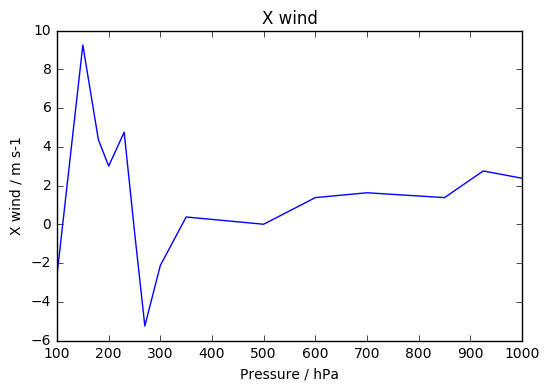

In [143]:
%matplotlib inline

from iris import quickplot

first_slice = next(points.take(1)[0].slices(['pressure']))

quickplot.plot(first_slice)

## THE MEGACUBE

In [183]:
param = 'high_type_cloud_area_fraction'

filtered_cubes = cubes \
    .filter(lambda x: x.name() == param) \
    .filter(lambda x: x.coords('realization')[0].points[0] != 0) \
    .filter(lambda x: x.coords('realization')[0].points[0] != 17)

print(list(filtered_cubes)[0])

high_type_cloud_area_fraction / (1) (latitude: 600; longitude: 800)
     Dimension coordinates:
          latitude                           x               -
          longitude                          -               x
     Scalar coordinates:
          forecast_period: 3.0 hours
          forecast_reference_time: 2016-12-03 00:00:00
          realization: 1
          time: 2016-12-03 03:00:00
     Attributes:
          STASH: m01s09i205
          source: Data from Met Office Unified Model
          um_version: 10.4


In [145]:
from iris.cube import CubeList

In [153]:
print(CubeList(filtered_cubes).merge()[0])

high_type_cloud_area_fraction / (1) (-- : 1064; latitude: 600; longitude: 800)
     Dimension coordinates:
          latitude                      -               x               -
          longitude                     -               -               x
     Auxiliary coordinates:
          forecast_period               x               -               -
          forecast_reference_time       x               -               -
          realization                   x               -               -
          time                          x               -               -
     Attributes:
          STASH: m01s09i205
          source: Data from Met Office Unified Model
          um_version: 10.4


In [107]:
relatively_big_cube = CubeList(filtered_cubes).merge()[0]

In [109]:
print(relatively_big_cube)

high_type_cloud_area_fraction / (1) (forecast_period: 58; forecast_reference_time: 2; latitude: 600; longitude: 800)
     Dimension coordinates:
          forecast_period                           x                            -            -               -
          forecast_reference_time                   -                            x            -               -
          latitude                                  -                            -            x               -
          longitude                                 -                            -            -               x
     Auxiliary coordinates:
          time                                      x                            x            -               -
     Attributes:
          STASH: m01s09i205
          source: Data from Met Office Unified Model
          um_version: 10.4


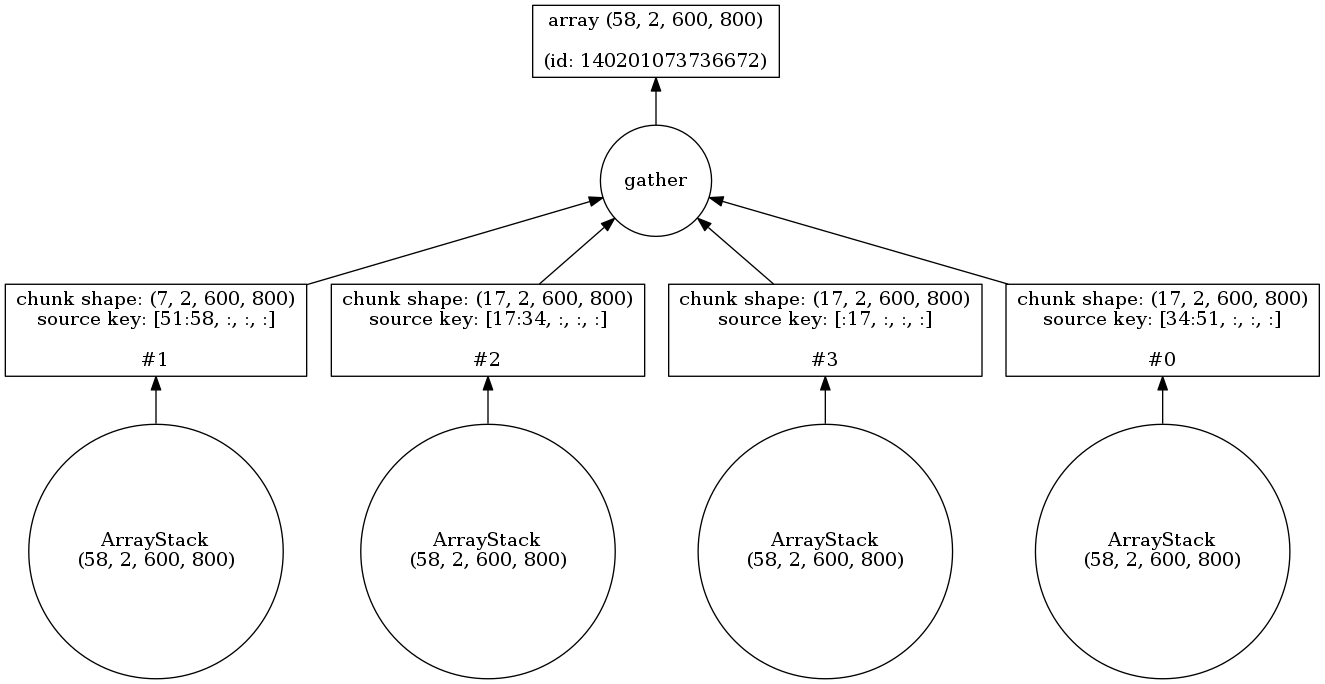

In [114]:
from biggus.dask_engine import DaskEngine
engine = DaskEngine(c.get)

dask.visualize(engine.graph(relatively_big_cube.lazy_data()))

In [118]:
relatively_big_cube.coords('forecast_period')

[DimCoord(array([   3.,    6.,    9.,   12.,   15.,   18.,   21.,   24.,   27.,
          30.,   33.,   36.,   39.,   42.,   45.,   48.,   51.,   54.,
          57.,   60.,   63.,   66.,   69.,   72.,   75.,   78.,   81.,
          84.,   87.,   90.,   93.,   96.,   99.,  102.,  105.,  108.,
         111.,  114.,  117.,  120.,  123.,  126.,  129.,  132.,  135.,
         138.,  141.,  144.,  147.,  150.,  153.,  156.,  159.,  162.,
         165.,  168.,  171.,  174.]), standard_name='forecast_period', units=Unit('hours'))]

In [122]:
print(relatively_big_cube)

high_type_cloud_area_fraction / (1) (forecast_period: 58; forecast_reference_time: 2; latitude: 600; longitude: 800)
     Dimension coordinates:
          forecast_period                           x                            -            -               -
          forecast_reference_time                   -                            x            -               -
          latitude                                  -                            -            x               -
          longitude                                 -                            -            -               x
     Auxiliary coordinates:
          time                                      x                            x            -               -
     Attributes:
          STASH: m01s09i205
          source: Data from Met Office Unified Model
          um_version: 10.4


In [121]:
relatively_big_cube.collapsed('forecast_period', iris.analysis.MEAN)

/opt/conda/lib/python3.5/site-packages/iris/coords.py:992: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'forecast_period'.
  warnings.warn(msg.format(self.name()))


ValueError: Cannot partially collapse a coordinate (time).

In [168]:
filtered_cubes.take(1)[0].coords('realization')[0].points

array([0])

In [172]:
members = dict(filtered_cubes.groupby(lambda x: x.coords('realization')[0].points[0]))

In [174]:
[len(members[key]) for key in members.keys()]

[116, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 20]

In [180]:
CubeList(members[16]).merge()

[<iris 'Cube' of high_type_cloud_area_fraction / (1) (time: 58; latitude: 600; longitude: 800)>]